## Load the Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

## Load Data-Set

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.head(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


### Delete a column Name = Id

In [4]:
df = df.drop(columns=["Id"])

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### basic statistics about the data

In [6]:
df.describe()  

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Basic info about data type


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### To display no. of samples an each class


In [8]:
df["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

## Preprocessing the dataset
- Check for null value

In [9]:
df.isnull().sum() 

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Exploratory Data Analysis

### Histogram

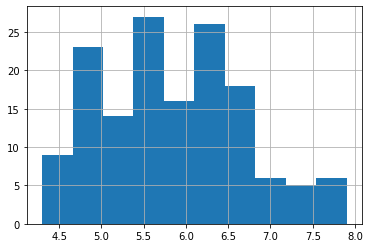

In [10]:
df["SepalLengthCm"].hist()
plt.show()

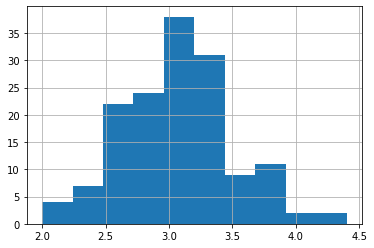

In [11]:
df["SepalWidthCm"].hist()
plt.show()

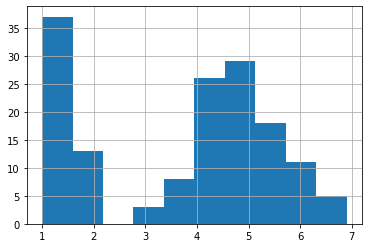

In [12]:
df["PetalLengthCm"].hist()
plt.show()

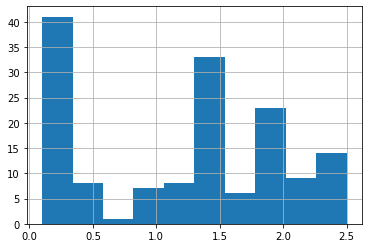

In [13]:
df["PetalWidthCm"].hist()
plt.show()

### Scatterplots

In [14]:
colors = ["red", "orange", "blue"]
species = ["Iris-virginica", "Iris-versicolor", "Iris-setosa"]

In [15]:
import matplotlib.pyplot as plt

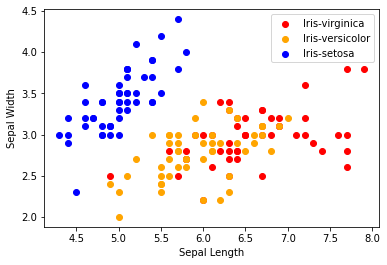

In [16]:
for i in range(3):
    x = df[df["Species"] == species[i]]
    plt.scatter(x["SepalLengthCm"], x["SepalWidthCm"], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

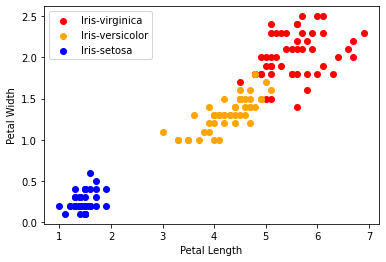

In [17]:
for i in range(3):
    x = df[df["Species"] == species[i]]
    plt.scatter(x["PetalLengthCm"], x["PetalWidthCm"], c = colors[i], label = species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

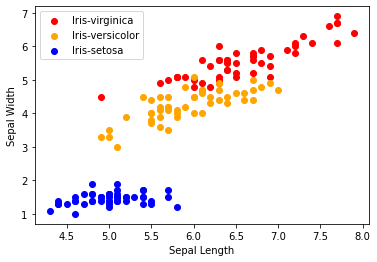

In [18]:
for i in range(3):
    x = df[df["Species"] == species[i]]
    plt.scatter(x["SepalLengthCm"], x["PetalLengthCm"], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

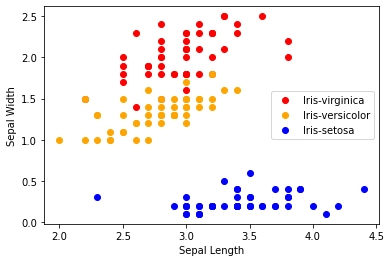

In [19]:
for i in range(3):
    x = df[df["Species"] == species[i]]
    plt.scatter(x["SepalWidthCm"], x["PetalWidthCm"], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

## Coorelation Matrix
##### A coorelation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. if two variables have high correlation. we can neglect one variable from those two.

In [20]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


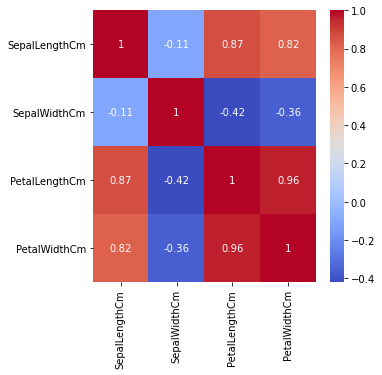

In [21]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap= "coolwarm")
plt.show()

## Label Encoder
#### In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. lalen encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [22]:
le = LabelEncoder()

In [23]:
df["Species"] = le.fit_transform(df["Species"])

In [24]:
df.head(6)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


In [25]:
df["Species"].value_counts() 

0    50
1    50
2    50
Name: Species, dtype: int64

Iris-versicolor    50 --> 0
Iris-setosa        50 --> 1
Iris-virginica     50 --> 2

## Model Training

In [26]:
from sklearn.model_selection import train_test_split

### training data :- 70%
### testing data :- 30%

In [27]:
X = df.drop(columns=["Species"])
y = df["Species"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)

## It is a clssification problem so that we use RandomForestClassification for Predict our model

### Using Random Forest Algo..

In [29]:
clf = RandomForestClassifier(max_depth=5, random_state=10)

### Model Training

In [30]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=10)

### Model Predicting

In [31]:
y_pred2 = clf.predict(X_train)

### Find The Accuracy

In [32]:
print("Accuracy : ", accuracy_score(y_train, y_pred2) * 100)

Accuracy :  100.0


## Predict the model Manually

In [33]:
y_pred = clf.predict([[6.3, 3.3, 6.0, 2.5]])

In [34]:
y_pred

array([2])

In [40]:
if y_pred == 0:
    print("Iris-setosa")
elif y_pred == 1:
    print("Iris-versicolor")
elif y_pred == 2:
    print("Iris-virginica")
else:
    print("Oops! Your Model is out of prediction")

Iris-virginica
